# Projet Numérique n°2 : Equations Différentielles

## BRETAUD David , DELMAS Louis

Système d'étude : en notant $x_1$ le nombre de proies et $x_2$ le nombre de prédateurs (tous les deux positifs), on a l'évolution suivante :
$$
\left\{\begin{matrix}
 \dot{x_1} = x_1(\alpha - \beta x_2)\\ 
 \dot{x_2} = -x_2(\gamma - \delta x_1)
\end{matrix}\right.
$$
où les 4 paramètres $\alpha$, $\beta$, $\gamma$ et $\delta$ sont strictements positifs.

In [49]:
# Modules numériques à importer pour la suite
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

# Représentation du système, réglages généraux :
a = 2   # alpha
b = 5    # beta
g = 3   # gamma
d = 4   # delta

L = 100
Int = np.linspace(-L, L, 15)

def f(x, y):
    return [x*(a-b*y), -y*(g-d*x)]

In [50]:
# Fonctions prédéfinies d'étude : 

def f1(x,y):
    return [x*(1-1*y), -y*(1-1*x)]

def f2(x,y):
    return [x*(9-2*y), -y*(9-2*x)]

def f3(x,y):
    return [x*(1-5*y), -y*(5-1*x)]

---

## Question 1


---

La population des proies a deux processus d'évolution : 
- le processus de natalité, qui augmente la population (variation positive), et est proportionnel au nombre actuel de cette population (plus on a de géniteurs, plus on a de nouveaux nés). Ce serait le terme en $\alpha x_1$ .
- le processus de mort, qui diminue la population (variation négative). Il faut prendre en compte la mort naturelle, et la mort par prédation : plus il y a de proies, plus on a un nombre susceptible de morts important, et plus il y a de prédateurs, plus les proies sont susceptibles de mourir, d'où un terme proportionnel en $x_1*x_2$, à savoir le terme $-\beta x_1x_2$.

Concernant la population des prédateurs, les deux processus sont :
- le processus de mortalité par mort naturelle, soit le terme en $-x_2\gamma$.
- le processus de natalité. Etant une population de prédateurs, plus il y aura de proies à chasser, plus elle pourra se multiplier, et à l'inverse, moins il y a de proies, moins il y a de nourriture donc naturellement, par pression naturelle, il y aura moins d'enfantement, d'où le terme en $+x_2x_1\delta$. 


On constate bien que si le processus de natalité est plus fort que le processus de mortalité, alors la population augmente, car $\dot{x_1} > 0$, et sinon, la population diminue ce qui se traduit bien par $\dot{x_1} < 0$. 

Les points d'équilibres vérifient :
$$
\left\{\begin{matrix}
 \dot{x_1} = 0\\ 
 \dot{x_2} = 0
\end{matrix}\right.
\Leftrightarrow
\left\{\begin{matrix}
 x_1(\alpha - \beta x_2) = 0 & (1)\\ 
-x_2(\gamma - \delta x_1) = 0 & (2)
\end{matrix}\right.
$$
On voit déjà que le système est vérifié pour le point (0,0). 

On multiplie par $\delta$ la première équation et la deuxième par $\beta$ puis on additionne :
Pour avoir $(x_1,x_2)$ non nul vérifiant le système non linéaire, on doit nécessairement avoir 
$$
\left\{\begin{matrix}
\alpha - \beta x_2 = 0 & \Rightarrow x_2 = \alpha / \beta \\
\gamma - \delta x_1 = 0 & \Rightarrow x_1 = \gamma / \delta
\end{matrix}\right.
$$
Le point d'équilibre $(\gamma / \delta , \alpha /\beta )$ est bien dans $\mathbb{R}^{*}_{+} \times \mathbb{R}^{*}_{+}$. 

Voyons voir si les points sont localement asymptotiquement stable. Calculons la différentielle de f définie par :
$$
f(x_1, x_2)= \bigl(\begin{smallmatrix}
x_1(\alpha - \beta x_2)\\ 
-x_2(\gamma - \delta x_1)
\end{smallmatrix}\bigr)
\rightarrow
J_f(x_1, x_2)= \bigl(\begin{smallmatrix}
\alpha - \beta x_2 & -\beta x_1\\ 
\delta x_2 & -\gamma + \delta x_1
\end{smallmatrix}\bigr)
$$
Evaluons la Jacobienne de f en $(0,0)$ et $(\gamma / \delta , \alpha /\beta )$ :
$$
J_f(0, 0)= J_1 = \bigl(\begin{smallmatrix}
\alpha & 0\\ 
0 & -\gamma 
\end{smallmatrix}\bigr)
\;\; et \; \;  
J_f(\gamma / \delta , \alpha /\beta )= J_2 =  \bigl(\begin{smallmatrix}
0 & -\beta \gamma / \delta\\ 
\delta \alpha / \beta & 0
\end{smallmatrix}\bigr)
$$
On utilise le fait qu'en dimension 2, on a l'équivalence suivante : $J \; est \; Hurwitz \Leftrightarrow tr(J) <0 \; et \; det(J)>0 \;$.

On constate que $J_1$ n'est pas Hurwitz car $\; det(J_1)=-\alpha \gamma <0 \;$ et $J_2$ non plus puisque $\; tr(J_2)=0 \;$. Ainsi, les deux points d'équilibres sont instables.

---

## Question 2

---

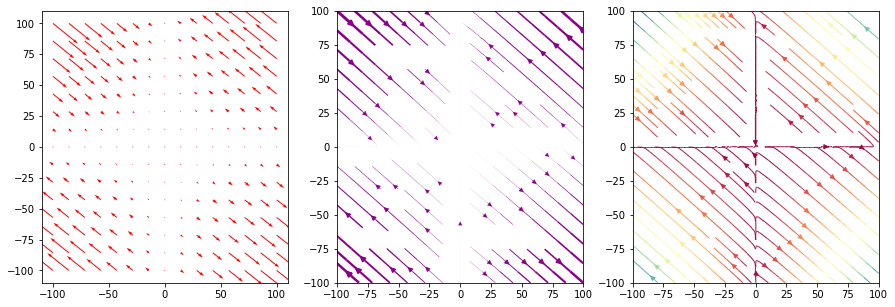

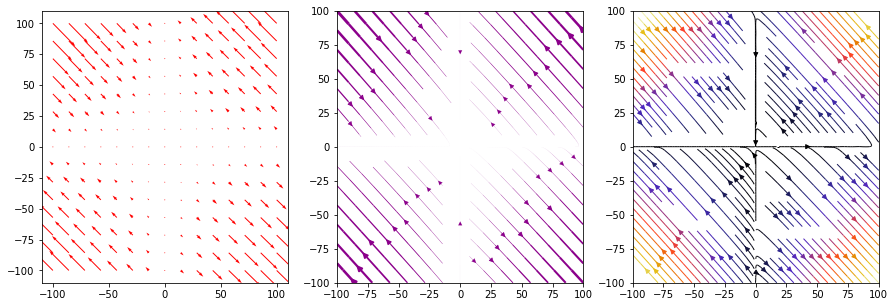

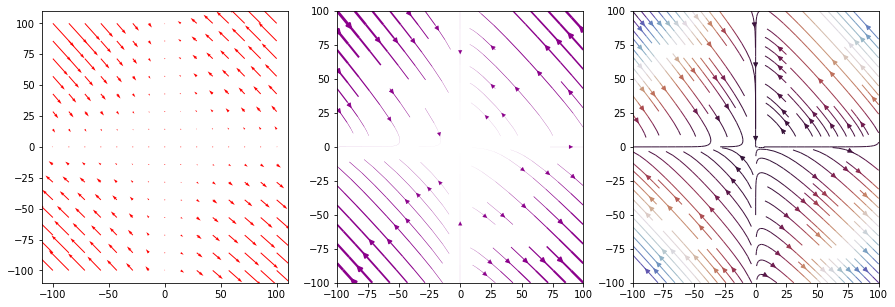

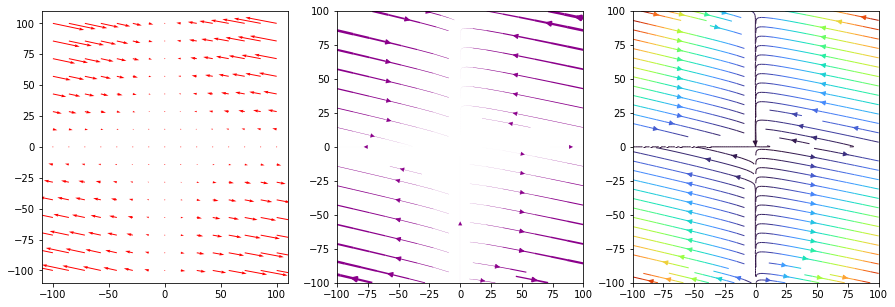

In [61]:
def portrait(f, Abs, Ord, styl) :
    X, Y = np.meshgrid(Abs, Ord)
    U, V = f(X,Y)
    speed = np.sqrt(U**2+V**2)
    lw = 3*speed/speed.max()
    
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(nrows=1, ncols=3)

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.quiver(X, Y, U, V, color = 'red')
    
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.streamplot(X, Y, U, V, density = 0.5, linewidth = lw, color = 'darkmagenta')

    ax2 = fig.add_subplot(gs[0, 2])
    ax2.streamplot(X, Y, U, V, color = lw, cmap=styl, linewidth = 1)

if True :
    portrait(f, Int, Int, 'Spectral') #'Spectral'
if True :
    portrait(f1, Int, Int, 'CMRmap') #'CMRmap'
if True :
    portrait(f2, Int, Int, 'twilight_shifted_r') #'twilight_shifted_r'
if True : 
    portrait(f3, Int, Int, 'turbo') #'turbo'


#Si tu veux une couleur cool pour les maps, à mettre en 4ème argument, voici la liste:
#List_color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
    